# Final Assignment - Part 2 [solutions]

### Assignment Instructions

#### Part 2   |   Advanced Difficulty Level

In this second part, you will be working with a datasets containing information on indian startups' funding, including the startup's details, the funding it received, and the investors' information. 

In the usual `data` folder, you will find the following three datasets, including data from 2019, 2020 and 2021: 

- `startup_funding2019.csv`
- `startup_funding2020.csv`
- `startup_funding2021.csv`

At [this link](https://www.kaggle.com/datasets/omkargowda/indian-startups-funding-data?select=startup_funding2019.csv) you can find the source of the original data (Kaggle) as well as more information on its composition *(note: the files in the data folder are slightly different from the originals)*.

1. Using a **for loop**, load all three .csv files in a temporary DataFrame called `df_tmp` and, at each cycle, add a new column named `Year` that includes the year of that csv file to the temporary table and append it to a final DataFrame named `fnd`. Your final `fnd` DataFrame should include the contents from all three csv files stacked one on top of the other. 

    What is the **shape** of the `fnd` DataFrame? 

In [44]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

In [45]:
os.listdir('../_data/')

['startup_funding2019.csv',
 'startup_funding2021.csv',
 'startup_funding2020.csv',
 'Software Professionals Salary.csv']

In [46]:
files = [x for x in os.listdir('../_data/') if x[0:4]=='star']
files

['startup_funding2019.csv',
 'startup_funding2021.csv',
 'startup_funding2020.csv']

In [47]:
files = [x for x in os.listdir('../_data/') if x[0:4]=='star']

fnd = pd.DataFrame([])
for file in files: 
    df_tmp = pd.read_csv('../_data/'+file)
    df_tmp['Year'] = file[-8:-4]
    fnd = pd.concat([fnd, df_tmp])

In [48]:
fnd.head(3)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019


In [49]:
fnd.shape

(2343, 10)

2. If you check the columns' data types, you'll notice that the columns `Founded`, `Amount($)` and `Year` are being interpreted as strings instead of numbers. Format those three columns to numeric data types. 

    What is the **total** `Amount($)` of funding given in the three years available?

In [50]:
fnd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2343 entries, 0 to 1051
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2343 non-null   object
 1   Founded        2102 non-null   object
 2   HeadQuarter    2228 non-null   object
 3   Sector         2325 non-null   object
 4   What it does   2343 non-null   object
 5   Founders       2324 non-null   object
 6   Investor       2243 non-null   object
 7   Amount($)      2211 non-null   object
 8   Stage          1220 non-null   object
 9   Year           2343 non-null   object
dtypes: object(10)
memory usage: 201.4+ KB


In [51]:
fnd['Year'] = pd.to_numeric(fnd['Year'])


In [52]:
fnd['Founded'] = fnd['Founded'].replace({'-':np.nan})
fnd['Founded'] = pd.to_numeric(fnd['Founded'])

In [53]:
fnd['Amount($)'] = fnd['Amount($)'].replace({'Undisclosed':''}, regex=False)
fnd['Amount($)'] = fnd['Amount($)'].str.replace('$','', regex=False)
fnd['Amount($)'] = fnd['Amount($)'].str.replace(',','', regex=False)
fnd['Amount($)'] = pd.to_numeric(fnd['Amount($)'])

In [54]:
fnd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2343 entries, 0 to 1051
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2343 non-null   object 
 1   Founded        2101 non-null   float64
 2   HeadQuarter    2228 non-null   object 
 3   Sector         2325 non-null   object 
 4   What it does   2343 non-null   object 
 5   Founders       2324 non-null   object 
 6   Investor       2243 non-null   object 
 7   Amount($)      1842 non-null   float64
 8   Stage          1220 non-null   object 
 9   Year           2343 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 201.4+ KB


In [55]:
fnd.head(3)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019


In [56]:
fnd['Amount($)'].sum()

271544633855.83002

3. The following code shows us that "Inflection Point Ventures" was the `Investor` that funded the highest number of `Company/Brand`s overall (36 companies funded from 2019 to 2021). 

    How did "Inflection Point Ventures" **rank** *(in terms of most `Company/Brand`s funded) **in 2020**? (Note: in the answer write the rank number, where 1 = most funded company)*

In [57]:
# run this cell (don not delete it)
fnd.groupby('Investor', as_index=False).size().sort_values('size', ascending=False).head(1)

,Investor,size
696,Inflection Point Ventures,36


In [58]:
year_fund = fnd.groupby(['Year','Investor'], as_index=False).size().sort_values(['Year','size'], ascending=[True,False])

In [59]:
year_fund['rank'] = year_fund.groupby('Year')['size'].rank("dense",ascending=False).astype(int)

In [60]:
year_fund[year_fund['Investor']=='Inflection Point Ventures']

,Year,Investor,size,rank
24,2019,Inflection Point Ventures,1,3
420,2020,Inflection Point Ventures,11,3
1311,2021,Inflection Point Ventures,24,1


4. Load the `Software Professionals Salary.csv` file in a DataFrame named `sps` (just like you did in Part 1), then perform the following tasks **and answer the question at the end**: 
    1. starting from the `sps` DataFrame, create a new DF called `sps_loc` where you group by `Location` and show, for each city in the dataset, the average `Rating` and `Salary`;
    2. starting from the `fnd` DataFrame, create a new DF called `fnd_loc` where you group by `HeadQuarter` and show, for each city in the dataset **for the year 2021**, the total number of `Company/Brand`s funded and the total `Amount($)` invested;
    3. merge the two DataFrames you just created so to **keep just the cities that are in both datasets** and save the results in a third DataFrame called `sps_fnd_loc` *(note: make sure to use the correct type of join)*;
    4. using the `sps_fnd_loc` DataFrame: 
        1. delete the `HeadQuarter` column
        2. create a new column `Amount($MM)` that is equal to `Amount($)` divided by 1,000,000
        3. delete the `Amount($)` column
        4. rename all the columns to the following names: `['City', 'Avg. Rating', 'Avg. Salary', 'Nr. Companies Funded', 'Sum Funding ($MM)']`
    
    **Question**: Look at the `City` that received the **highest** `Avg. Rating` score by employees: what is the `Nr. Companies Funded` in that city? 

In [61]:
sps = pd.read_csv("../_data/Software Professionals Salary.csv")
sps.head(3)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android


In [62]:
# 4A
sps_loc = sps.groupby('Location', as_index=False)[['Rating','Salary']].mean()
sps_loc.head(3)

,Location,Rating,Salary
0,Bangalore,3.920232,735344.739593
1,Chennai,3.902726,584559.661513
2,Hyderabad,3.914484,679099.157376


In [63]:
# 4B
fnd_loc = fnd[fnd['Year']==2021].groupby('HeadQuarter', as_index=False).agg({'Company/Brand':'count', 'Amount($)': 'sum'})
fnd_loc.head(3)

,HeadQuarter,Company/Brand,Amount($)
0,Ahmadabad,6,4300000.0
1,Ahmedabad,11,198155000.0
2,Ambernath,1,0.0


In [64]:
# 4C
sps_fnd_loc = sps_loc.merge(fnd_loc, how='inner', left_on='Location', right_on='HeadQuarter')
sps_fnd_loc

,Location,Rating,Salary,HeadQuarter,Company/Brand,Amount($)
0,Bangalore,3.920232,735344.739593,Bangalore,425,1.432742e+10
1,Chennai,3.902726,584559.661513,Chennai,40,7.171400e+08
2,Hyderabad,3.914484,679099.157376,Hyderabad,34,2.439600e+08
3,Jaipur,3.940741,629135.802469,Jaipur,11,3.433000e+08
4,Kolkata,4.024719,710925.573034,Kolkata,5,2.800000e+07
5,Mumbai,3.881709,961180.368491,Mumbai,200,1.538303e+11
6,New Delhi,3.943415,658756.735632,New Delhi,143,1.673010e+09
7,Pune,3.886082,690476.311153,Pune,46,5.090700e+08


In [65]:
# 4Da
if 'HeadQuarter' in sps_fnd_loc.columns: 
    del sps_fnd_loc['HeadQuarter']
# 4Db
sps_fnd_loc['Amount($MM)'] = sps_fnd_loc['Amount($)']/1000000
# 4Dc
if 'Amount($)' in sps_fnd_loc.columns: 
    del sps_fnd_loc['Amount($)']
# 4Dd
sps_fnd_loc.columns = ['City','Avg. Rating','Avg. Salary','Nr. Companies Funded','Sum Funding ($MM)']

In [66]:
sps_fnd_loc

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
0,Bangalore,3.920232,735344.739593,425,14327.42
1,Chennai,3.902726,584559.661513,40,717.14
2,Hyderabad,3.914484,679099.157376,34,243.96
3,Jaipur,3.940741,629135.802469,11,343.30
4,Kolkata,4.024719,710925.573034,5,28.00
5,Mumbai,3.881709,961180.368491,200,153830.30
6,New Delhi,3.943415,658756.735632,143,1673.01
7,Pune,3.886082,690476.311153,46,509.07


In [67]:
sps_fnd_loc[sps_fnd_loc['Avg. Rating']==sps_fnd_loc['Avg. Rating'].max()]['Nr. Companies Funded']

4    5
Name: Nr. Companies Funded, dtype: int64

5. Create a scatterplot that shows the relationship between the `Avg. Salary` and the `Sum Funding ($MM)`. Which `City` stands out in terms of total funding received by companies and salary paid to their employees? 

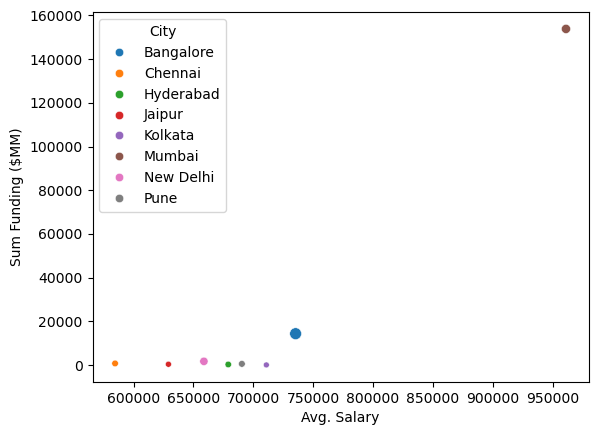

In [82]:
plot = sns.scatterplot(
    x='Avg. Salary', 
    y='Sum Funding ($MM)', 
    size='Nr. Companies Funded', 
    hue='City', 
    data=sps_fnd_loc,
    legend='brief'
)

# Remove the size legend entry
handles, labels = plot.get_legend_handles_labels()
new_handles = handles[1:len(set(sps_fnd_loc['City']))+1]
new_labels = labels[1:len(set(sps_fnd_loc['City']))+1]

plot.legend(new_handles, new_labels, title='City')

plt.show()

Mumbai, which has the highest levels of both average salary and total funding received. 